# Laboratorio #6

In [118]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
import string
import matplotlib.pyplot as plt
from textblob import TextBlob

In [119]:
# 2. Upload the data on Python.
bernardo  = pd.read_csv('data/bernardoArevalo.csv')
sandra  = pd.read_csv('data/sandraTorres.csv')
trafico  = pd.read_csv('data/traficogt.csv')

In [120]:
bernardo.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1702109621899407575,1702109621899407575,https://twitter.com/eltuitdehoy_/status/170210...,2023-09-13 23:58:52+00:00,"{'id': 46561608, 'id_str': '46561608', 'url': ...",es,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...,0,0,...,NaN,NaN,NaN,1.702089e+18,"{'id': 1419402501212811265, 'username': 'AnonG...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1702109505947865192,1702109505947865192,https://twitter.com/totitafuentes/status/17021...,2023-09-13 23:58:24+00:00,"{'id': 1005627722, 'id_str': '1005627722', 'ur...",es,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...,0,1,...,NaN,NaN,NaN,1.702056e+18,"{'id': 291888009, 'username': 'ASIERVERA', 'di...","<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,Twitter for iPad,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",2,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1702109134387134664,1702109134387134664,https://twitter.com/Fernand0483/status/1702109...,2023-09-13 23:56:55+00:00,"{'id': 1512621569834688513, 'id_str': '1512621...",es,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...,0,0,...,NaN,NaN,NaN,1.701799e+18,"{'id': 84055675, 'username': 'VicZacariasGT', ...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1702108943495926143,1702108943495926143,https://twitter.com/MaxTiger502/status/1702108...,2023-09-13 23:56:10+00:00,"{'id': 891058586, 'id_str': '891058586', 'url'...",es,@Igor_Bitkov No le sigan el juego a este ruso ...,1,0,...,NaN,NaN,NaN,1.701898e+18,"{'id': 707086237753090048, 'username': 'Igor_B...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


In [121]:
sandra.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1701686249797345422,1701686249797345422,https://twitter.com/Yeya16155804/status/170168...,2023-09-12 19:56:32+00:00,"{'id': 1213902343311245313, 'id_str': '1213902...",es,@bernardosilvagt @BArevalodeLeon @DrGiammattei...,0,0,...,NaN,NaN,NaN,1.701683e+18,"{'id': 3337026291, 'username': 'bernardosilvag...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1701686065361215632,1701686065361215632,https://twitter.com/Palomin17772524/status/170...,2023-09-12 19:55:48+00:00,"{'id': 1420560045323038720, 'id_str': '1420560...",es,@_awskl @mjcabrerar @BArevalodeLeon @TSEGuatem...,0,0,...,NaN,NaN,NaN,1.701685e+18,"{'id': 390988524, 'username': '_awskl', 'displ...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701176209076609121,1701176209076609121,https://twitter.com/iRizhao/status/17011762090...,2023-09-11 10:09:49+00:00,"{'id': 1533663614770421761, 'id_str': '1533663...",en,The 2023 National Race Walking Championship &a...,5,34,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1701684889081307215,1701684889081307215,https://twitter.com/_awskl/status/170168488908...,2023-09-12 19:51:07+00:00,"{'id': 390988524, 'id_str': '390988524', 'url'...",es,@Palomin17772524 @mjcabrerar @BArevalodeLeon @...,1,0,...,NaN,NaN,NaN,1.701684e+18,"{'id': 1420560045323038720, 'username': 'Palom...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
4,4,1701684719815970972,1701684719815970972,https://twitter.com/Mr_andrew89/status/1701684...,2023-09-12 19:50:27+00:00,"{'id': 454924874, 'id_str': '454924874', 'url'...",es,@ASolaresM @Mike051270 @BArevalodeLeon Otro es...,0,0,...,NaN,NaN,NaN,1.701329e+18,"{'id': 310913844, 'username': 'ASolaresM', 'di...","<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


In [122]:
trafico.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1701654244858679742,1701654244858679742,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-12 17:49:21+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",1,2,...,"{'id': 1701651855212691764, 'id_str': '1701651...",NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1701651855212691764,1701651855212691764,https://twitter.com/amilcarmontejo/status/1701...,2023-09-12 17:39:52+00:00,"{'id': 372126670, 'id_str': '372126670', 'url'...",es,CONDUCTORA QUE SE NEGÓ A MOVILIZAR VEHÍCULO ES...,149,78,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",http://twitter.com/download/iphone,Twitter for iPhone,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
2,2,1701348453916311903,1701348453916311903,https://twitter.com/edgarduarteagui/status/170...,2023-09-11 21:34:15+00:00,"{'id': 100815432, 'id_str': '100815432', 'url'...",es,Camión de arena volteado en el viaducto el pul...,2,1,...,NaN,NaN,NaN,NaN,NaN,"<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
3,3,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",3,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1701216420997017888,1701216420997017888,https://twitter.com/EmisorasUnidas/status/1701...,2023-09-11 12:49:36+00:00,"{'id': 40256008, 'id_str': '40256008', 'url': ...",es,"#AHORA Amílcar Montejo, director de Comunicaci...",0,0,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://twitter.com"" rel=""nofollow"">T...",https://twitter.com,TweetDeck Web App,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet


In [123]:
bernardo = bernardo[bernardo['lang'] == 'es']
sandra = sandra[sandra['lang'] == 'es']
trafico = trafico[trafico['lang'] == 'es']

In [124]:
# Concatenate DataFrames
all_tweets = pd.concat([bernardo, sandra, trafico], ignore_index=True)

# If you want to save the concatenated DataFrame to a new CSV:
all_tweets.to_csv('all_tweets.csv', index=False)

In [125]:
all_tweets = pd.read_csv('all_tweets.csv')

In [126]:
all_tweets.head()

,Unnamed: 0,id,id_str,url,date,user,lang,rawContent,replyCount,retweetCount,...,quotedTweet,place,coordinates,inReplyToTweetId,inReplyToUser,source,sourceUrl,sourceLabel,media,_type
0,0,1702109621899407575,1702109621899407575,https://twitter.com/eltuitdehoy_/status/170210...,2023-09-13 23:58:52+00:00,"{'id': 46561608, 'id_str': '46561608', 'url': ...",es,@AnonGTReloaded @msemillagt @BArevalodeLeon ja...,0,0,...,NaN,NaN,NaN,1.702089e+18,"{'id': 1419402501212811265, 'username': 'AnonG...","<a href=""https://mobile.twitter.com"" rel=""nofo...",https://mobile.twitter.com,Twitter Web App,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
1,1,1702109505947865192,1702109505947865192,https://twitter.com/totitafuentes/status/17021...,2023-09-13 23:58:24+00:00,"{'id': 1005627722, 'id_str': '1005627722', 'ur...",es,@ASIERVERA @AztecaNoticiaGT @BArevalodeLeon Do...,0,1,...,NaN,NaN,NaN,1.702056e+18,"{'id': 291888009, 'username': 'ASIERVERA', 'di...","<a href=""http://twitter.com/#!/download/ipad"" ...",http://twitter.com/#!/download/ipad,Twitter for iPad,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet
2,2,1701995859229958189,1701995859229958189,https://twitter.com/DrDavidCabrera/status/1701...,2023-09-13 16:26:49+00:00,"{'id': 743252657083650048, 'id_str': '74325265...",es,"Paciente de 39 años, dolor lumbar de 1 año tra...",2,17,...,NaN,NaN,NaN,NaN,NaN,"<a href=""https://help.twitter.com/en/using-twi...",https://help.twitter.com/en/using-twitter/how-...,advertiser-interface,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
3,3,1702109134387134664,1702109134387134664,https://twitter.com/Fernand0483/status/1702109...,2023-09-13 23:56:55+00:00,"{'id': 1512621569834688513, 'id_str': '1512621...",es,@VicZacariasGT @soy_502 @BArevalodeLeon @msemi...,0,0,...,NaN,NaN,NaN,1.701799e+18,"{'id': 84055675, 'username': 'VicZacariasGT', ...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,{'photos': [{'url': 'https://pbs.twimg.com/med...,snscrape.modules.twitter.Tweet
4,4,1702108943495926143,1702108943495926143,https://twitter.com/MaxTiger502/status/1702108...,2023-09-13 23:56:10+00:00,"{'id': 891058586, 'id_str': '891058586', 'url'...",es,@Igor_Bitkov No le sigan el juego a este ruso ...,1,0,...,NaN,NaN,NaN,1.701898e+18,"{'id': 707086237753090048, 'username': 'Igor_B...","<a href=""http://twitter.com/download/android"" ...",http://twitter.com/download/android,Twitter for Android,"{'photos': [], 'videos': [], 'animated': []}",snscrape.modules.twitter.Tweet


# 3.1 Data preprocessing

In [127]:
print(all_tweets.columns)
print(all_tweets.head())

Index(['Unnamed: 0', 'id', 'id_str', 'url', 'date', 'user', 'lang',
       'rawContent', 'replyCount', 'retweetCount', 'likeCount', 'quoteCount',
       'conversationId', 'hashtags', 'cashtags', 'mentionedUsers', 'links',
       'viewCount', 'retweetedTweet', 'quotedTweet', 'place', 'coordinates',
       'inReplyToTweetId', 'inReplyToUser', 'source', 'sourceUrl',
       'sourceLabel', 'media', '_type'],
      dtype='object')
   Unnamed: 0                   id               id_str  \
0           0  1702109621899407575  1702109621899407575   
1           1  1702109505947865192  1702109505947865192   
2           2  1701995859229958189  1701995859229958189   
3           3  1702109134387134664  1702109134387134664   
4           4  1702108943495926143  1702108943495926143   

                                                 url  \
0  https://twitter.com/eltuitdehoy_/status/170210...   
1  https://twitter.com/totitafuentes/status/17021...   
2  https://twitter.com/DrDavidCabrera/status/170

In [128]:
all_tweets['rawContent'] = all_tweets['rawContent'].str.lower()

special_chars = ["#", "@", "'"]
for char in special_chars:
    all_tweets['rawContent'] = all_tweets['rawContent'].str.replace(char, "")

all_tweets['rawContent'] = all_tweets['rawContent'].str.replace(r'http\S+', '', regex=True)


In [129]:
# def remove_emojis(data):
#     emoji_pattern = re.compile("["
#                            u"\U0001F600-\U0001F64F"  # emoticons
#                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                            u"\U0001F700-\U0001F77F"  # alchemical symbols
#                            u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
#                            u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
#                            u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
#                            u"\U0001FA00-\U0001FA6F"  # Chess Symbols
#                            u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
#                            u"\U00002702-\U000027B0"  # Dingbats
#                            u"\U000024C2-\U0001F251"  # Flags (iOS)
#                            "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', data)

# all_tweets['text'] = all_tweets['text'].apply(remove_emojis)
all_tweets['rawContent'] = all_tweets['rawContent'].str.replace(r'[\U00010000-\U0010ffff]', '', regex=True)

In [130]:
all_tweets['rawContent'] = all_tweets['rawContent'].str.translate(str.maketrans('', '', string.punctuation))

In [131]:
nltk.download('stopwords')

stop = stopwords.words('spanish')
all_tweets['rawContent'] = all_tweets['rawContent'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [132]:
all_tweets['rawContent'] = all_tweets['rawContent'].str.replace('\d+', '')


# 4 Exploratory Analysis

In [133]:
unique_users = all_tweets['user'].nunique()
print(f"Number of unique users: {unique_users}")


Number of unique users: 6670


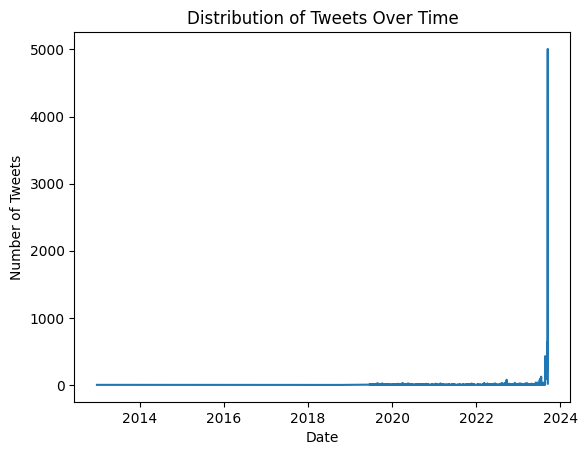

In [134]:
all_tweets['date'] = pd.to_datetime(all_tweets['date'])
all_tweets.groupby(all_tweets['date'].dt.date).size().plot(kind='line')
plt.title('Distribution of Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.show()

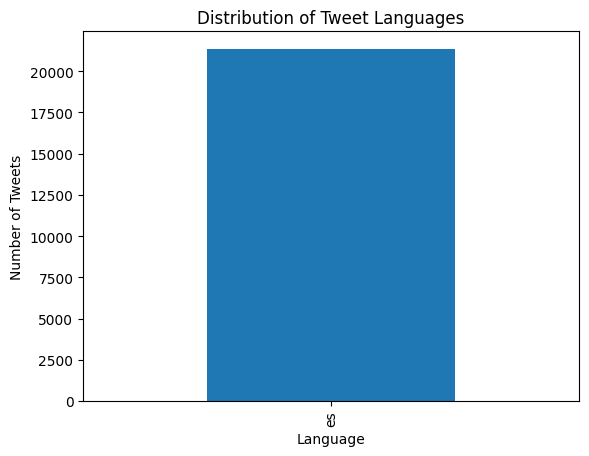

In [135]:
all_tweets['lang'].value_counts().plot(kind='bar')
plt.title('Distribution of Tweet Languages')
plt.xlabel('Language')
plt.ylabel('Number of Tweets')
plt.show()

In [136]:
# Traffic related tweets
traffic_keywords = ['#traficogt', '#transitogt', 'amilcarmontejo']
traffic_tweets = all_tweets[all_tweets['rawContent'].str.contains('|'.join(traffic_keywords))]

# Candidate related tweets
candidates_keywords = ['bernardo arevalo', 'sandra torres']
candidates_tweets = all_tweets[all_tweets['rawContent'].str.contains('|'.join(candidates_keywords))]

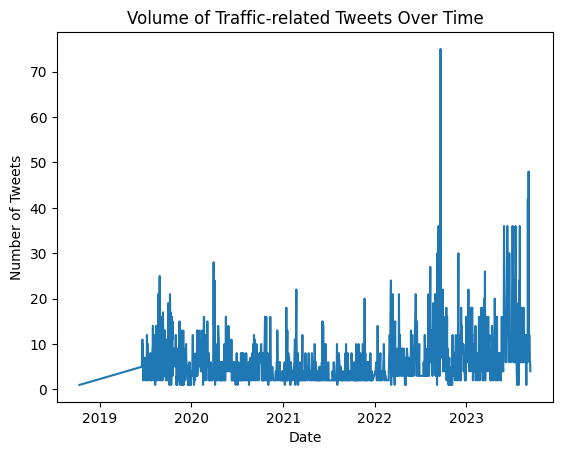

In [137]:
# Convert 'date' to datetime format
all_tweets['date'] = pd.to_datetime(all_tweets['date'])

# Plotting for traffic tweets
traffic_tweets.groupby(traffic_tweets['date'].dt.date).size().plot()
plt.title("Volume of Traffic-related Tweets Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Tweets")
plt.show()

In [138]:
# For traffic tweets:
top_traffic_influencers = traffic_tweets.groupby('user')['retweetCount'].sum().nlargest(10)

# For candidate tweets:
top_candidate_influencers = candidates_tweets.groupby('user')['retweetCount'].sum().nlargest(10)

In [139]:
all_tweets['sentiment'] = all_tweets['rawContent'].apply(lambda x: TextBlob(x).sentiment.polarity)

In [140]:
# Traffic related tweets
traffic_keywords = ['traficogt', 'transitogt', 'amilcarmontejo']
traffic_tweets = all_tweets[all_tweets['rawContent'].str.contains('|'.join(traffic_keywords))]

# Candidate related tweets
candidates_keywords = ['bernardo arevalo', 'sandra torres']
candidates_tweets = all_tweets[all_tweets['rawContent'].str.contains('|'.join(candidates_keywords))]

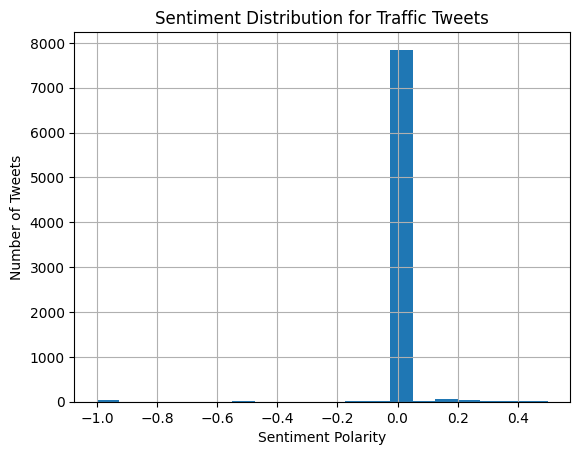

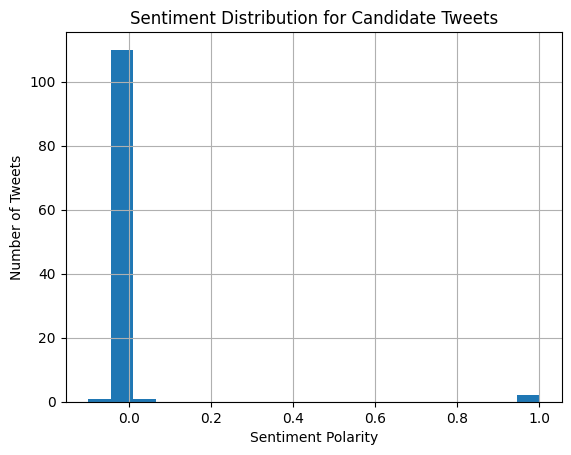

In [141]:
# For Traffic Tweets
traffic_tweets['sentiment'].hist(bins=20)
plt.title("Sentiment Distribution for Traffic Tweets")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Tweets")
plt.show()

# For Candidate Tweets
candidates_tweets['sentiment'].hist(bins=20)
plt.title("Sentiment Distribution for Candidate Tweets")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Number of Tweets")
plt.show()

In [142]:
print("Top Traffic Influencers:")
print(top_traffic_influencers)

print("\nTop Candidate Influencers:")
print(top_candidate_influencers)

Top Traffic Influencers:
user
{'id': 64616760, 'id_str': '64616760', 'url': 'https://twitter.com/Bebetino', 'username': 'Bebetino', 'displayname': 'Jose Arellano', 'rawDescription': 'Flying is the answer, what was the question?', 'created': datetime.datetime(2009, 8, 11, 3, 49, 8, tzinfo=datetime.timezone.utc), 'followersCount': 431, 'friendsCount': 1641, 'statusesCount': 18474, 'favouritesCount': 115, 'listedCount': 1, 'mediaCount': 1156, 'location': '5.5 NM NNW of AUR VOR', 'profileImageUrl': 'https://pbs.twimg.com/profile_images/1349532300082618369/sGv0ytcL_normal.jpg', 'profileBannerUrl': 'https://pbs.twimg.com/profile_banners/64616760/1610588549', 'protected': None, 'verified': False, 'blue': False, 'blueType': None, 'descriptionLinks': [{'url': 'http://www.airliners.net/', 'text': 'airliners.net', 'tcourl': 'https://t.co/fr7VGj231J'}], '_type': 'snscrape.modules.twitter.User'}                                                                                                         